In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

df = pd.read_csv("tips (data for regression problem).csv")


df.dropna(inplace=True)


df = df[(np.abs(df['total_bill'] - df['total_bill'].mean()) <= (3 * df['total_bill'].std()))]
df = df[(np.abs(df['tip'] - df['tip'].mean()) <= (3 * df['tip'].std()))]

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
df['time'] = df['time'].apply(lambda x: 1 if x == 'Dinner' else 0)
day_mapping = {'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3}
df['day'] = df['day'].map(day_mapping)

In [2]:
X = df.drop('tip', axis=1)
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

print("Model Performance Metrics:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

Model Performance Metrics:
Linear Regression - Mean Squared Error: 1.04, R^2 Score: 0.30
Ridge Regression - Mean Squared Error: 1.04, R^2 Score: 0.30
Lasso Regression - Mean Squared Error: 1.06, R^2 Score: 0.28
Decision Tree - Mean Squared Error: 1.94, R^2 Score: -0.31
Random Forest - Mean Squared Error: 1.12, R^2 Score: 0.24
SVR - Mean Squared Error: 1.04, R^2 Score: 0.30
KNN - Mean Squared Error: 1.13, R^2 Score: 0.24


In [3]:
lr = LinearRegression().fit(X_train, y_train)
coefficients = pd.Series(lr.coef_, index=X.columns)
print("\nSignificant Factors Impacting Tip Amounts (Linear Regression Coefficients):")
print(coefficients)


Significant Factors Impacting Tip Amounts (Linear Regression Coefficients):
total_bill    0.073519
sex          -0.054527
smoker       -0.024898
day          -0.007858
time          0.052772
size          0.229518
dtype: float64


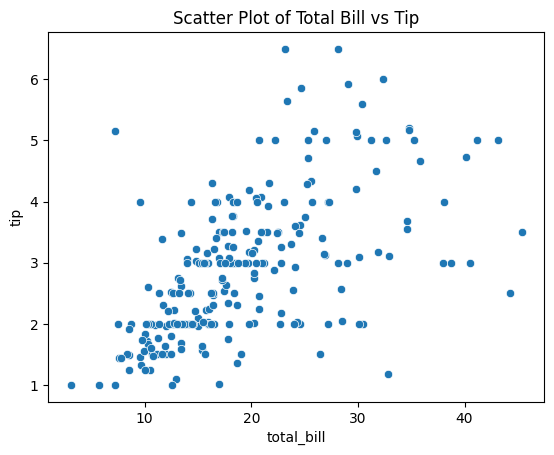

In [4]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

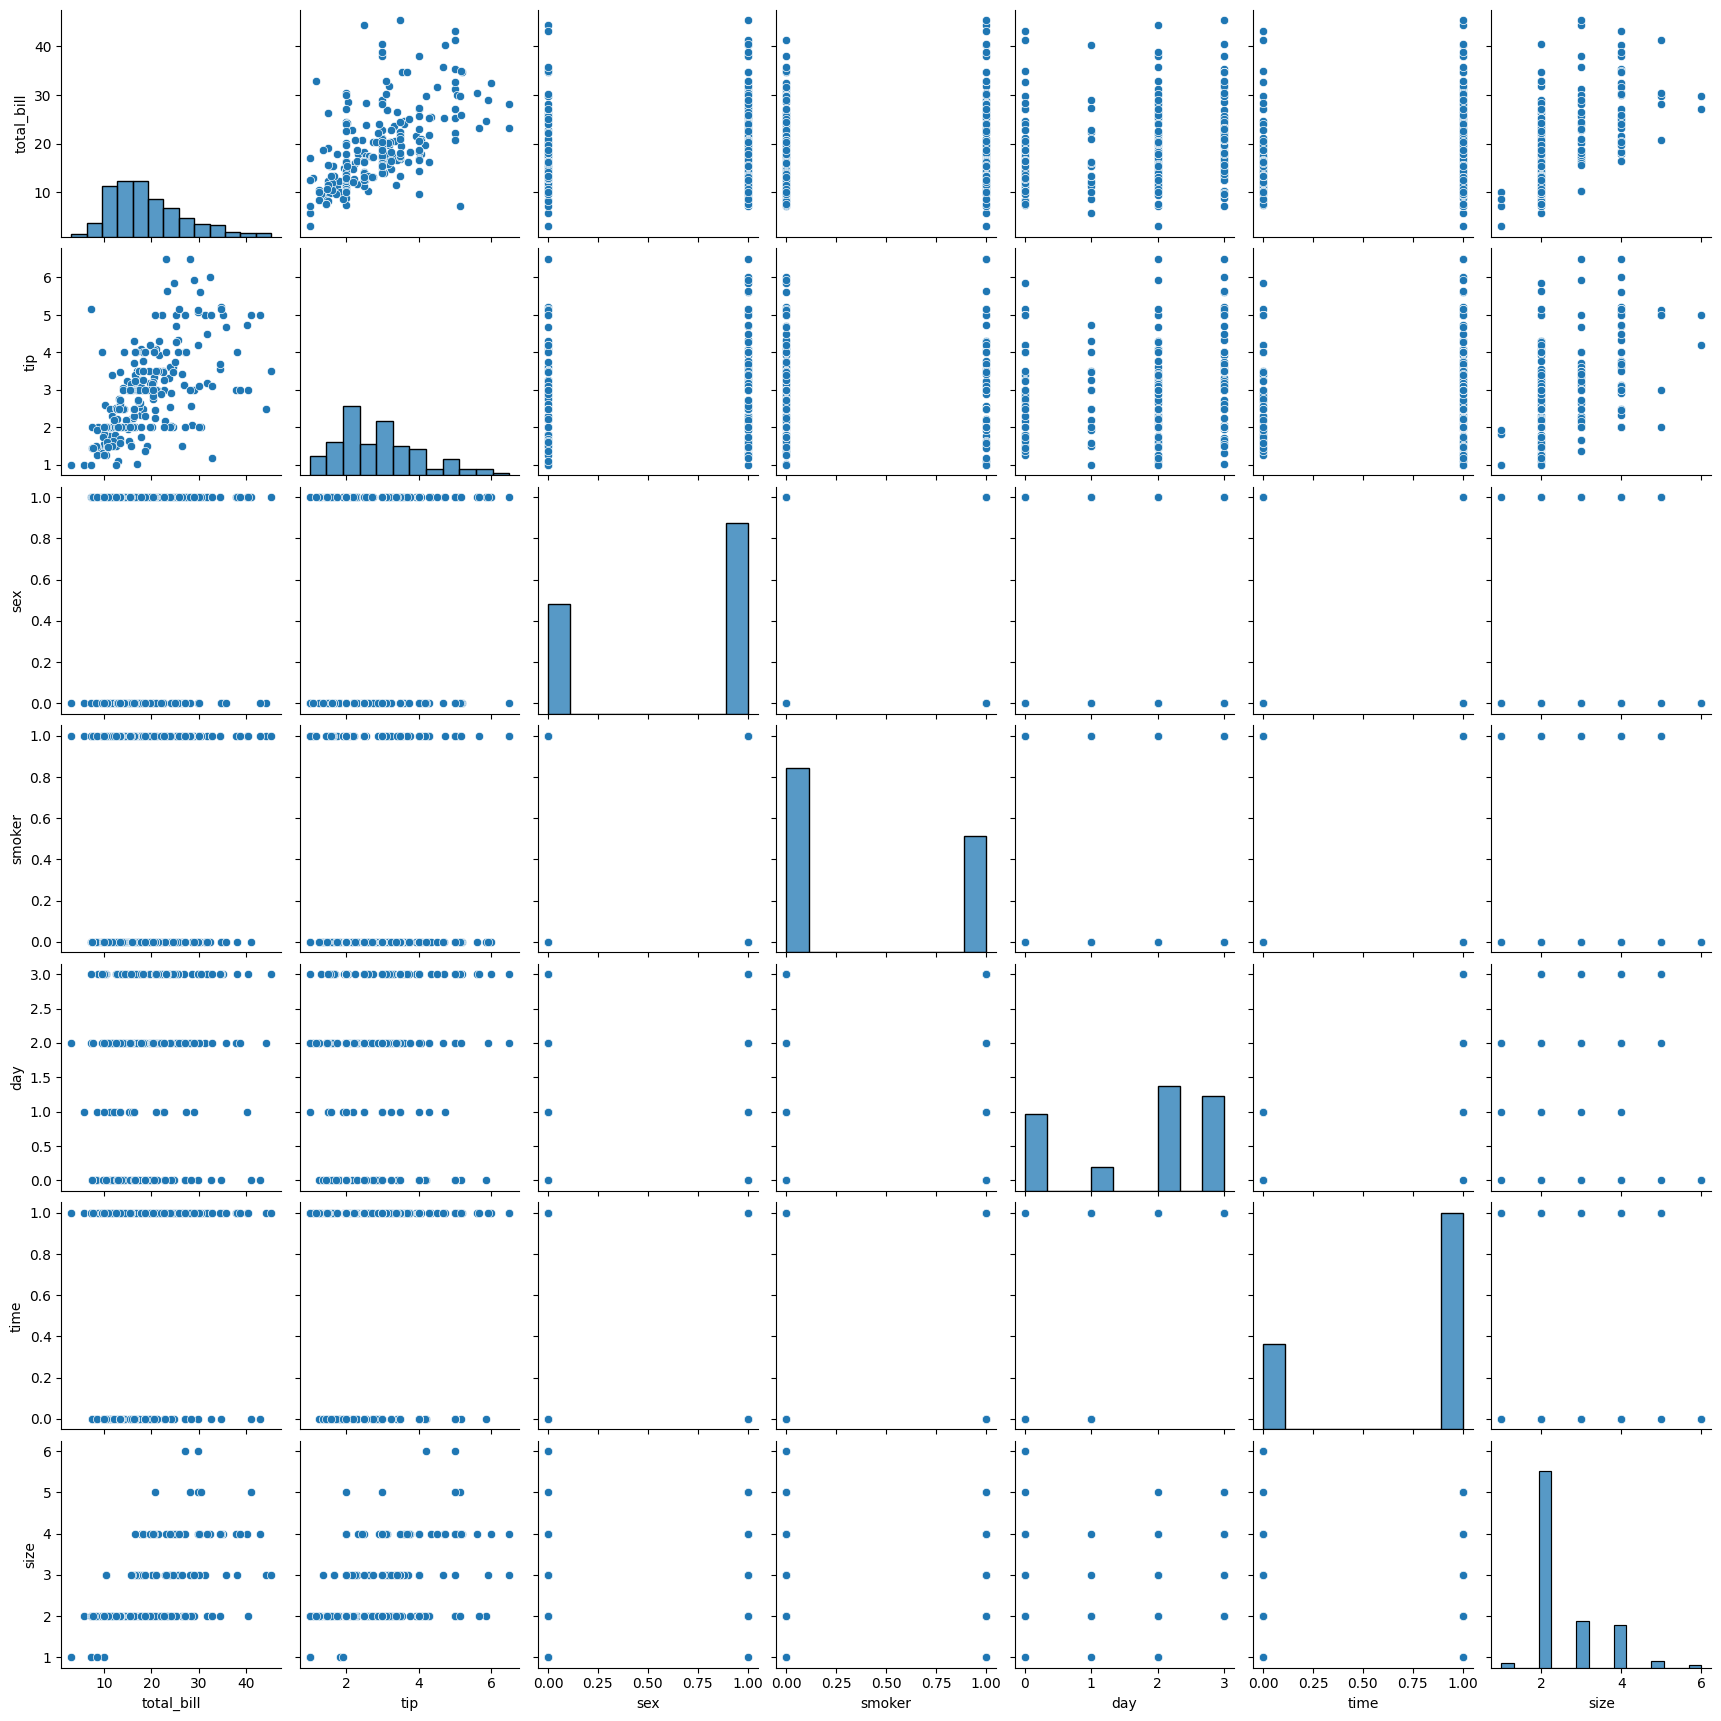

In [5]:
sns.pairplot(df)
plt.show()

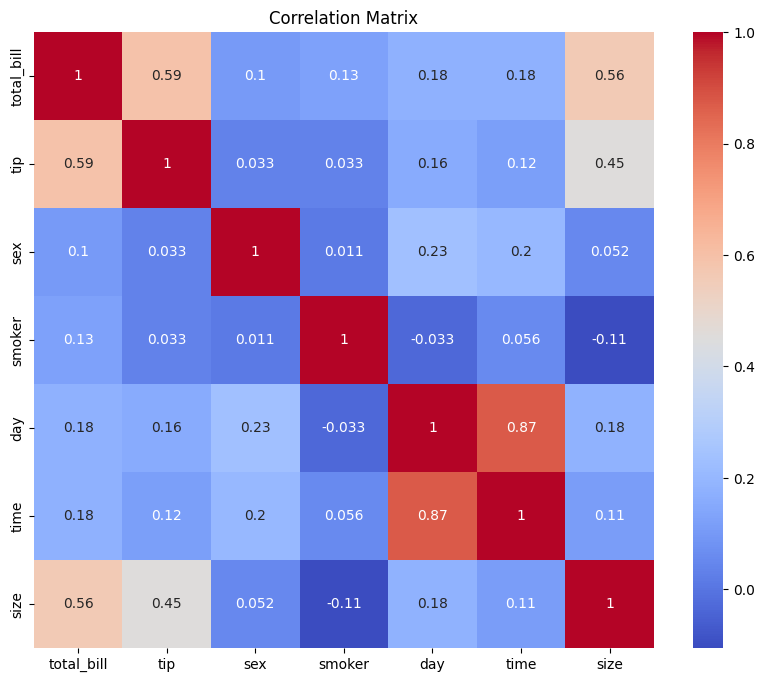

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
X_rainbow = sm.add_constant(X)
model = sm.OLS(y, X_rainbow).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"\nRainbow Test - Statistic: {rainbow_stat:.2f}, P-value: {rainbow_p_value:.2f}")


Rainbow Test - Statistic: 1.13, P-value: 0.26


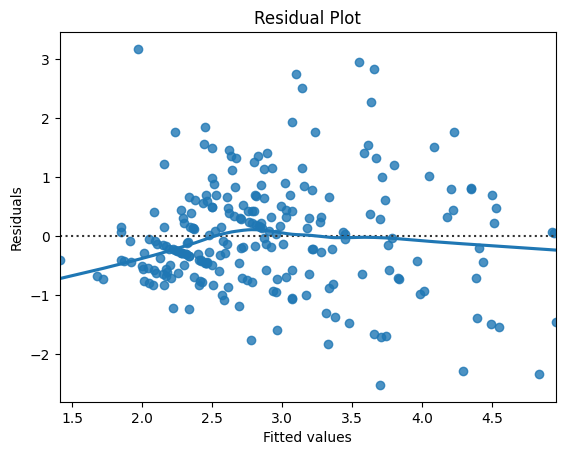

In [8]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()